In [1]:
import os
import numpy as np
import pandas as pd
import transform

from matplotlib import pyplot as plt

figdir = '../../figure/digital-signal-synthesis'

cmap = plt.get_cmap('tab20c')

os.makedirs(figdir, exist_ok=True)

In [2]:
# accumulator bits
N = 8

# clock iterations
M = 50

# reference frequency
f_ref = 1e9

# output frequency
f_out = 1e8

# accumulator step
dphi = np.ceil(2**N * f_out / f_ref)

# accumulator values over one period
phi = np.cumsum(dphi * np.ones(M)).astype(np.uint8)

# accumulator iterations
n = 2**N * np.linspace(0, 1, M)

# output signal
s = np.cos(2*np.pi*phi / 2**N)

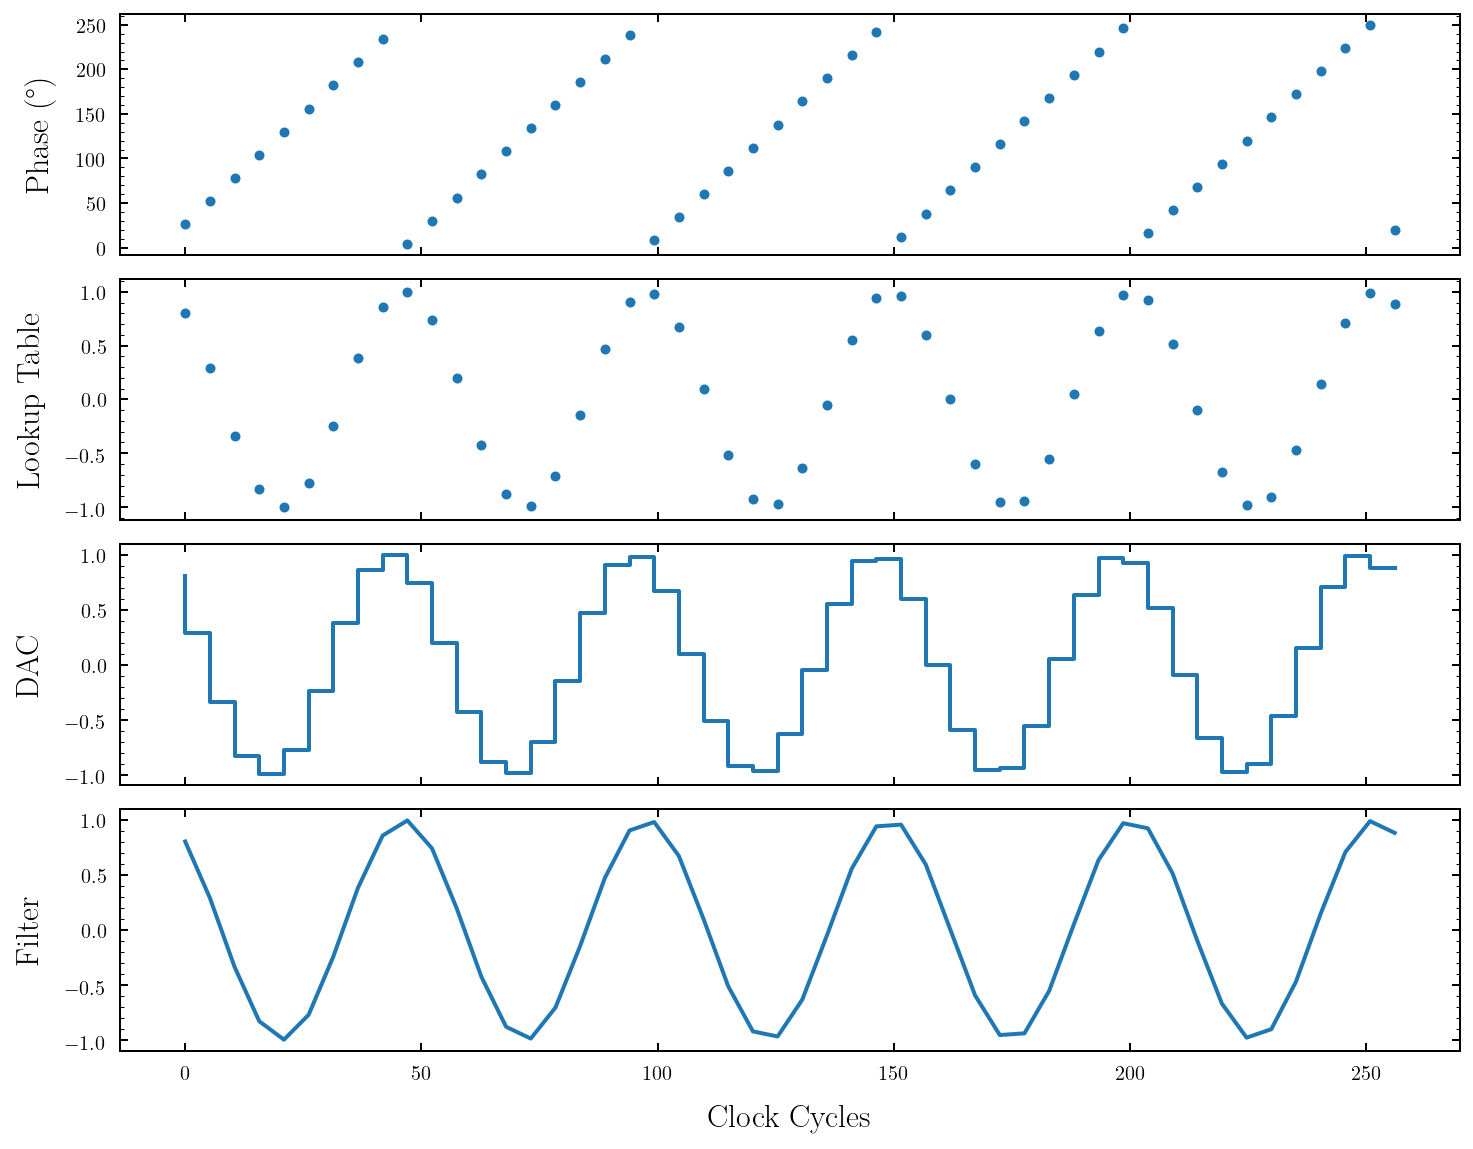

In [38]:
fig, axes = plt.subplots(nrows=4, sharex=True, figsize=(12, 8))

axes[0].scatter(n, phi)
axes[0].set_ylabel('Phase (\si{\degree})')

axes[1].scatter(n, s)
axes[1].set_ylabel('Lookup Table')

axes[2].step(n, s)
axes[2].set_ylabel('DAC')

axes[3].plot(n, s)
axes[3].set_ylabel('Filter')
axes[3].set_xlabel('Clock Cycles')

plt.subplots_adjust(hspace=.1, top=.98, bottom=.08)
plt.savefig(os.path.join(figdir, 'simple-output.pdf'))
plt.savefig(os.path.join(figdir, 'simple-output.pgf'))
plt.show()

In [5]:
dphi_250 = np.ceil(250 * f_out / f_ref)
dphi_256 = np.ceil(256 * f_out / f_ref)

sys_iter = 300

phi_250 = np.cumsum(dphi_250 * np.ones(sys_iter)).astype(np.uint8)
phi_256 = np.cumsum(dphi_256 * np.ones(sys_iter)).astype(np.uint8)

phi_err = phi_256-phi_250

m = np.arange(len(phi_err))

out_250 = np.cos(2*np.pi*phi_250 / 250)
out_256 = np.cos(2*np.pi*phi_256 / 256)

f_250, pd_250 = transform.fft(m / f_ref, out_250)
f_256, pd_256 = transform.fft(m / f_ref, out_256)

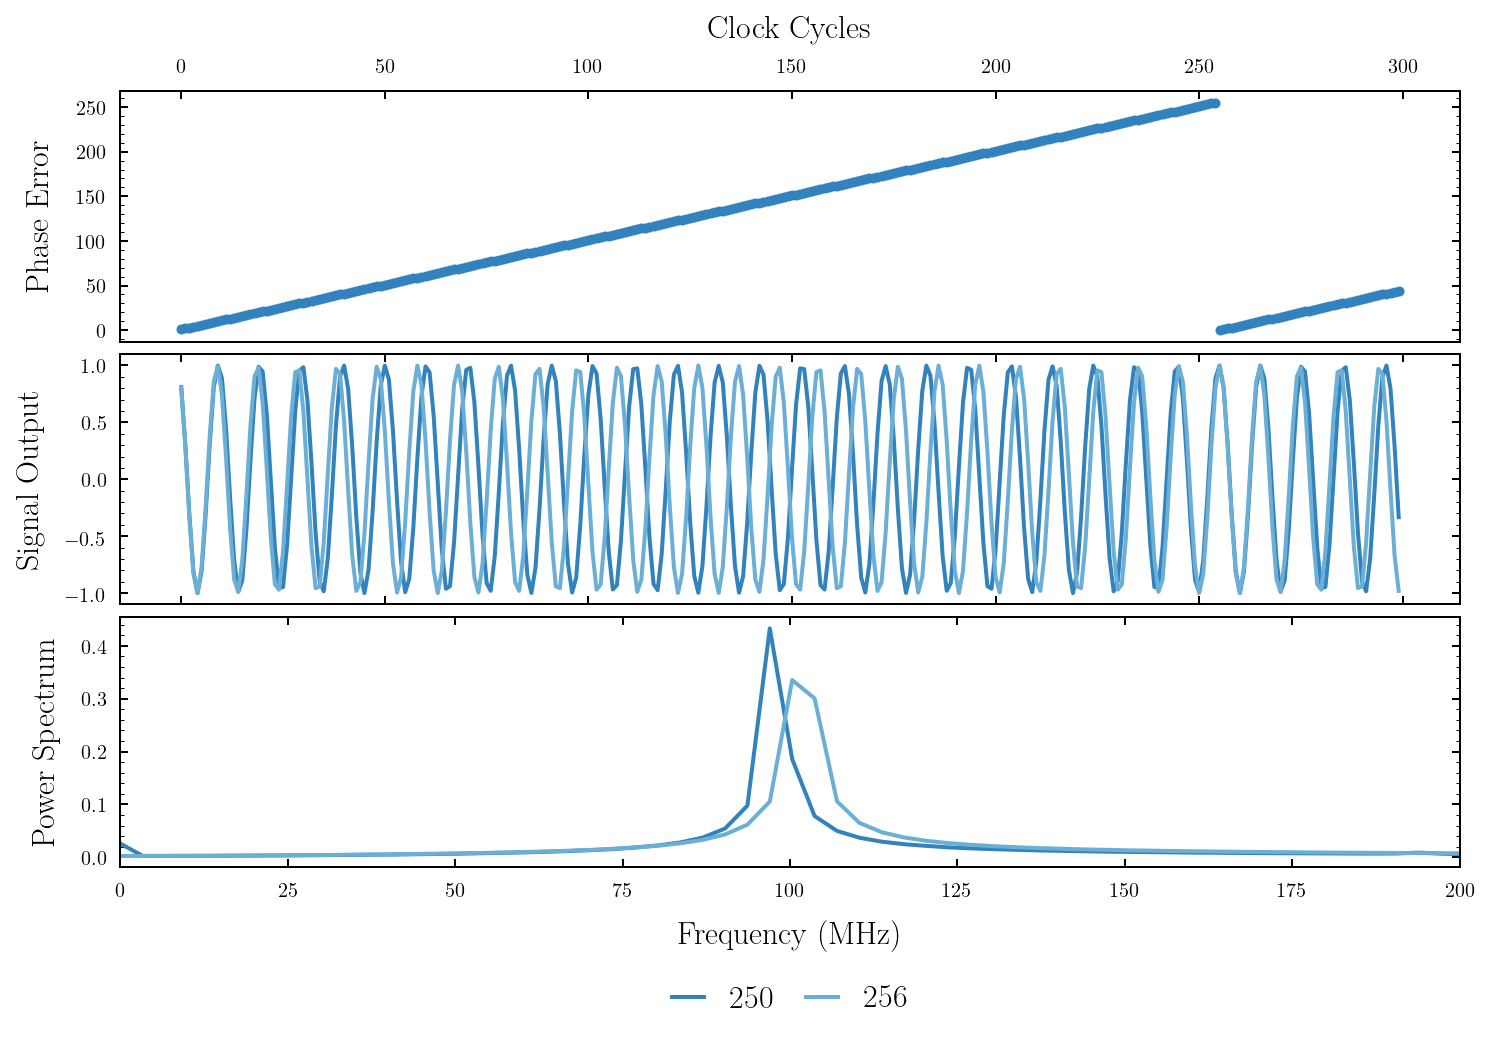

In [71]:
fig, axes = plt.subplots(nrows=3, figsize=(12, 7))

axes[0].scatter(m, phi_err, color=cmap.colors[0])
axes[0].set_ylabel('Phase Error')
axes[0].set_xlabel('Clock Cycles')

axes[1].plot(out_250, label='250', color=cmap.colors[0])
axes[1].plot(out_256, label='256', color=cmap.colors[1])
axes[1].set_ylabel('Signal Output')

axes[0].get_shared_x_axes().join(axes[0], axes[1])
axes[1].set_xticklabels([])
axes[0].xaxis.tick_top()
axes[0].xaxis.set_label_position('top')

axes[2].plot(f_250 / 1e6, pd_250, color=cmap.colors[0], label='250')
axes[2].plot(f_256 / 1e6, pd_256, color=cmap.colors[1], label='256')
axes[2].set_xlabel('Frequency (\si{\mega\hertz})')
axes[2].set_ylabel('Power Spectrum')
axes[2].set_xlim(0, 200)
axes[2].legend(loc='upper center', bbox_to_anchor=(.5, -0.35), ncol=2)

plt.subplots_adjust(hspace=.05, top=.92, bottom=.15)
plt.savefig(os.path.join(figdir, 'phase-error.pdf'))
plt.savefig(os.path.join(figdir, 'phase-error.pgf'))
plt.show()

In [96]:
f_1 = np.linspace(0, f_ref / 2, 300)
f_2 = np.linspace(0.08 * f_ref, 0.12 * f_ref, 300)

H_1 = np.sinc(f_1 / f_ref)**2
H_2 = np.sinc(f_2 / f_ref)**2

H_lin = np.poly1d(np.polyfit(f_2, H_2, 2))

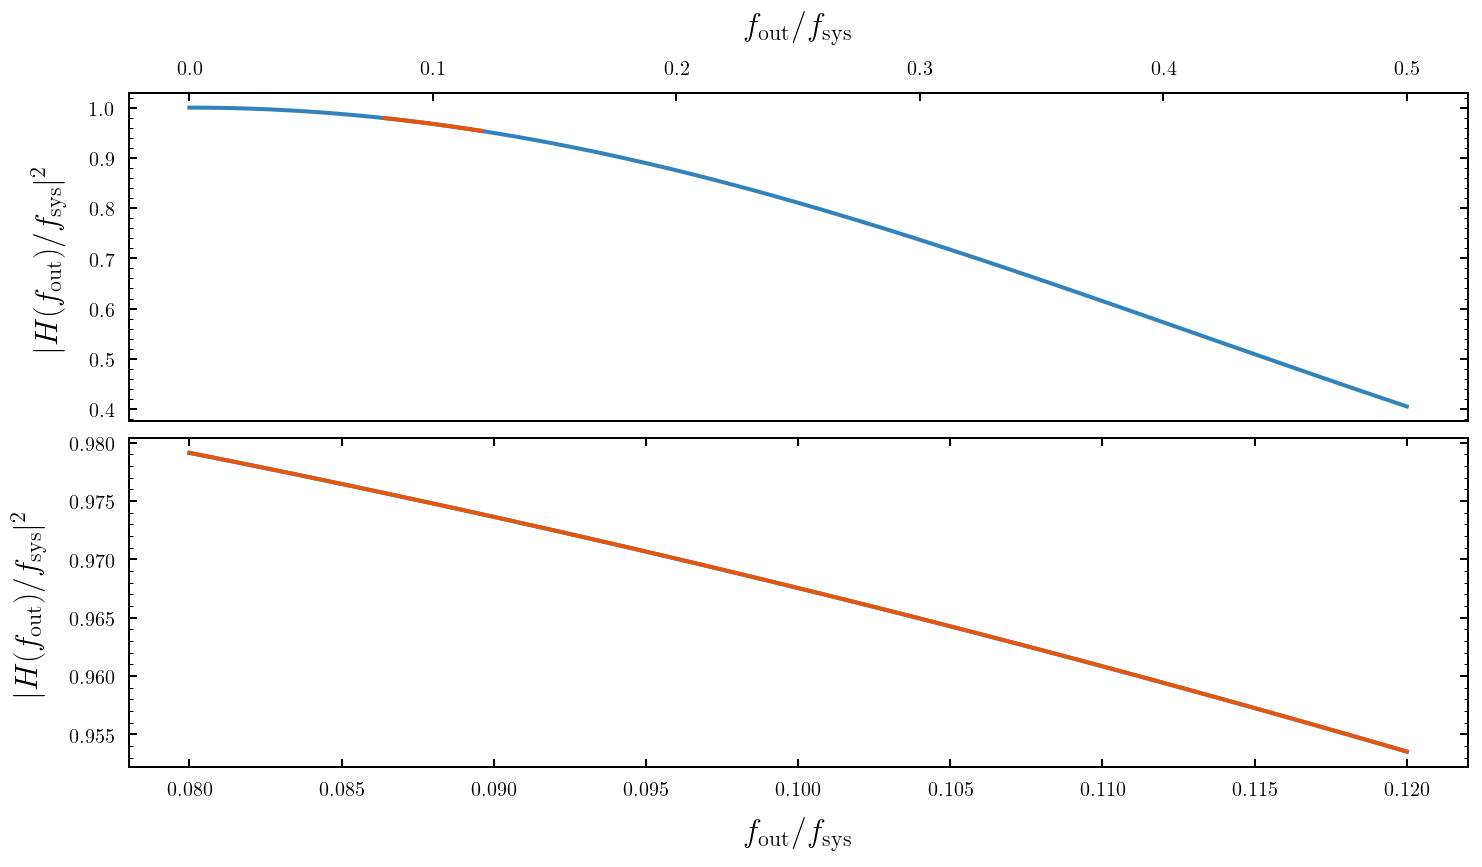

In [102]:
fig, axes = plt.subplots(nrows=2, figsize=(12, 6))

axes[0].plot(f_1 / f_ref, H_1, color=cmap.colors[0])
axes[0].plot(f_2 / f_ref, H_lin(f_2), color=cmap.colors[4])
axes[0].set_xlabel(r'$f_\text{out}/f_\text{sys}$')
axes[0].set_ylabel(r'$\vert H(f_\text{out})/f_\text{sys}\vert^2$')
axes[0].xaxis.tick_top()
axes[0].xaxis.set_label_position('top')

axes[1].plot(f_2 / f_ref, H_2, color=cmap.colors[0])
axes[1].plot(f_2 / f_ref, H_lin(f_2), color=cmap.colors[4])
axes[1].set_xlabel(r'$f_\text{out}/f_\text{sys}$')
axes[1].set_ylabel(r'$\vert H(f_\text{out})/f_\text{sys}\vert^2$')

plt.subplots_adjust(hspace=.05, top=.90, bottom=.10)
plt.savefig(os.path.join(figdir, 'response.pdf'))
plt.savefig(os.path.join(figdir, 'response.pgf'))
plt.show()

In [101]:
z = H_lin(f_2)
z.max() - z.min()

0.025617392536638528